In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [2]:
df_features = pd.read_csv('bank_transaction_features.csv')

In [3]:
df_features


,bank_transaction_id,bank_transaction_description,bank_transaction_amount,bank_transaction_type
0,21786195,citylink,-13.80,MPO
1,21786196,citylink,-13.14,DEB
2,21786197,1Jul19 OYSTER,-36.98,DEB
3,21786198,travelodge,-75.73,MPO
4,21786199,6Jul19 RINGGO,-37.86,CSH
...,...,...,...,...
12495,24140325,COVERSURE,-28.46,FPO
12496,24140326,DIRECTLINE INS FASTER PAYMENTS OUT,-35.64,FPO
12497,24140327,SUNDRY DEBIT Direct Debit coversure,-22.37,DD
12498,24140328,17Aug19 insurance Direct Debit,-23.11,DD


In [4]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bank_transaction_id           12500 non-null  int64  
 1   bank_transaction_description  12369 non-null  object 
 2   bank_transaction_amount       12500 non-null  float64
 3   bank_transaction_type         12500 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 390.8+ KB


In [5]:
df_features.describe()

,bank_transaction_id,bank_transaction_amount
count,1.250000e+04,12500.000000
mean,2.226077e+07,-19.613017
std,9.391952e+05,15.060147
min,2.178620e+07,-102.590000
25%,2.178932e+07,-28.022500
50%,2.179244e+07,-19.040000
75%,2.179557e+07,-4.687500
max,2.414033e+07,-0.320000


In [6]:
df_features.isnull().sum()

bank_transaction_id               0
bank_transaction_description    131
bank_transaction_amount           0
bank_transaction_type             0
dtype: int64

In [7]:
#df_new = df_features.dropna()

In [8]:
#df_new.isnull().sum()

In [9]:
df_1 = df_features.groupby('bank_transaction_type').nunique()

In [10]:
df_1

,bank_transaction_id,bank_transaction_description,bank_transaction_amount
bank_transaction_type,,,
CHG,2510,1543,211
CSH,2041,1686,1619
DD,1108,926,827
DEB,4678,3899,3013
FPO,679,618,577
MPO,1484,1370,1260


In [11]:
x = df_features['bank_transaction_type']

In [12]:
y = df_features['bank_transaction_amount']

<AxesSubplot:xlabel='bank_transaction_type', ylabel='Count'>

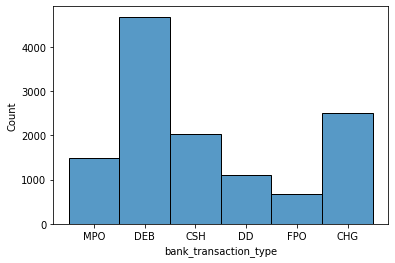

In [13]:
sns.histplot(data = x)

<AxesSubplot:xlabel='bank_transaction_amount', ylabel='Count'>

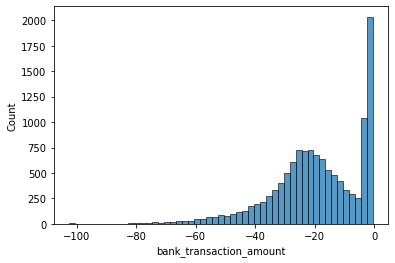

In [14]:
sns.histplot(y)

In [15]:
df_labels = pd.read_csv('bank_transaction_labels.csv')

In [16]:
df_labels

,bank_transaction_id,bank_transaction_category,bank_transaction_dataset
0,21786195,TRAVEL,TRAIN
1,21786196,TRAVEL,TRAIN
2,21786197,TRAVEL,TRAIN
3,21786198,TRAVEL,TRAIN
4,21786199,TRAVEL,TRAIN
...,...,...,...
12495,24140325,INSURANCE,VAL
12496,24140326,INSURANCE,VAL
12497,24140327,INSURANCE,VAL
12498,24140328,INSURANCE,VAL


In [17]:
category = df_labels['bank_transaction_category']

In [18]:
transact = df_labels['bank_transaction_dataset']

<AxesSubplot:xlabel='bank_transaction_dataset', ylabel='Count'>

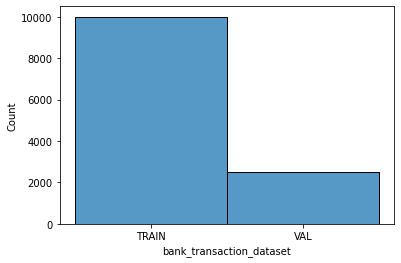

In [19]:
sns.histplot(data = transact)

In [20]:
import matplotlib.ticker as ticker

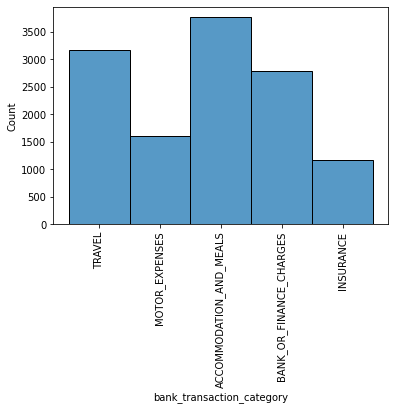

In [21]:
ax = sns.histplot(data = category)
plt.xticks(rotation = 90) 
plt.show()

In [22]:
df_labels.isnull().sum()

bank_transaction_id          0
bank_transaction_category    0
bank_transaction_dataset     0
dtype: int64

In [23]:
df_unique = df_labels.groupby('bank_transaction_category').nunique()

In [24]:
df_unique

,bank_transaction_id,bank_transaction_dataset
bank_transaction_category,,
ACCOMMODATION_AND_MEALS,3765,2
BANK_OR_FINANCE_CHARGES,2790,2
INSURANCE,1170,2
MOTOR_EXPENSES,1609,2
TRAVEL,3166,2


In [25]:
df_description = df_features['bank_transaction_description']

In [26]:
df_description

0                                   citylink
1                                   citylink
2                              1Jul19 OYSTER
3                                 travelodge
4                              6Jul19 RINGGO
                        ...                 
12495                              COVERSURE
12496     DIRECTLINE INS FASTER PAYMENTS OUT
12497    SUNDRY DEBIT Direct Debit coversure
12498         17Aug19 insurance Direct Debit
12499               enterprise car insurance
Name: bank_transaction_description, Length: 12500, dtype: object

In [27]:
df_description.str.lower()

0                                   citylink
1                                   citylink
2                              1jul19 oyster
3                                 travelodge
4                              6jul19 ringgo
                        ...                 
12495                              coversure
12496     directline ins faster payments out
12497    sundry debit direct debit coversure
12498         17aug19 insurance direct debit
12499               enterprise car insurance
Name: bank_transaction_description, Length: 12500, dtype: object

In [28]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [29]:
pattern = '[0-9]'

In [30]:
import re

In [31]:
df_description = df_description.str.replace(r'[^a-zA-Z ]\s?',r'',regex=True)

In [32]:
df_description

0                                   citylink
1                                   citylink
2                                  JulOYSTER
3                                 travelodge
4                                  JulRINGGO
                        ...                 
12495                              COVERSURE
12496     DIRECTLINE INS FASTER PAYMENTS OUT
12497    SUNDRY DEBIT Direct Debit coversure
12498              Auginsurance Direct Debit
12499               enterprise car insurance
Name: bank_transaction_description, Length: 12500, dtype: object

In [33]:
df_description =df_description.astype(str)

In [34]:
df_description

0                                   citylink
1                                   citylink
2                                  JulOYSTER
3                                 travelodge
4                                  JulRINGGO
                        ...                 
12495                              COVERSURE
12496     DIRECTLINE INS FASTER PAYMENTS OUT
12497    SUNDRY DEBIT Direct Debit coversure
12498              Auginsurance Direct Debit
12499               enterprise car insurance
Name: bank_transaction_description, Length: 12500, dtype: object

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
vectorizer = CountVectorizer()

In [37]:
vectorizer

CountVectorizer()

In [38]:
vectorizer.fit(df_description)

CountVectorizer()

In [39]:
X = vectorizer.transform(df_description)

In [40]:
X.shape

(12500, 845)

In [41]:
x_train = X[:10001]

In [42]:
y_train = X[10002:]

In [43]:
df_category = df_labels['bank_transaction_category']

In [44]:
df_category

0           TRAVEL
1           TRAVEL
2           TRAVEL
3           TRAVEL
4           TRAVEL
           ...    
12495    INSURANCE
12496    INSURANCE
12497    INSURANCE
12498    INSURANCE
12499    INSURANCE
Name: bank_transaction_category, Length: 12500, dtype: object

In [45]:
x_test = df_category[:10001]

In [46]:
y_test = df_category[10002:]

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()

In [49]:
X_T = le.fit_transform(x_test)

In [50]:
X_T

array([4, 4, 4, ..., 2, 2, 4])

In [51]:
Y_T = le.fit_transform(y_test)

In [52]:
Y_T

array([4, 4, 4, ..., 2, 2, 2])

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [54]:
model = SVC()

In [55]:
model.fit(x_train,X_T)

SVC()

In [56]:
predict = model.predict(x_train)

In [57]:
print(accuracy_score(X_T,predict)*100)

94.5005499450055


In [58]:
CM_train = confusion_matrix(X_T, predict)
CM_train

array([[2887,    0,    0,    4,  126],
       [   0, 2248,    0,    0,    2],
       [   1,    0,  880,   21,   18],
       [  82,   11,   41, 1043,   58],
       [  64,   45,    0,   77, 2393]], dtype=int64)

In [59]:
predict_test = model.predict(y_train)

In [60]:
print(accuracy_score(Y_T,predict_test)*100)

91.79343474779824


In [61]:
Precision= precision_score(Y_T, predict_test,  average="macro")
Precision

0.9154020895158649

In [62]:
Recall = recall_score(Y_T, predict_test,  average="macro")
Recall

0.9128406736169836

In [63]:
F1 = f1_score(Y_T, predict_test,  average="macro")
F1

0.9137805337127063

In [64]:
CM_test = confusion_matrix(Y_T, predict_test)

In [65]:
CM_test

array([[707,   1,   0,   0,  40],
       [  1, 536,   0,   0,   3],
       [  1,   2, 234,   3,  10],
       [ 19,   1,  21, 308,  25],
       [ 29,  15,   0,  34, 508]], dtype=int64)

In [66]:

from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(x_train, X_T) 


c:\users\rohit\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [67]:

y_pred = classifier.predict(x_train) 


In [68]:
print(accuracy_score(X_T,y_pred)*100)

93.84061593840616


In [69]:
predict_logistic = classifier.predict(y_train)

In [70]:
print(accuracy_score(Y_T,predict_logistic)*100)

91.67333867093676


In [71]:
Precision= precision_score(Y_T, predict_logistic,  average="macro")

In [72]:
Precision

0.9131480319531837

In [73]:
Recall = recall_score(Y_T, predict_logistic,  average="macro")
Recall

0.91173455197089

In [74]:
F1 = f1_score(Y_T, predict_logistic,  average="macro")

In [75]:
F1

0.9117713254664093

In [76]:
CM_logistic = confusion_matrix(Y_T, predict_logistic)

In [77]:
CM_logistic

array([[706,   4,   0,   0,  38],
       [  0, 539,   0,   0,   1],
       [  0,   6, 236,   5,   3],
       [ 18,   3,  22, 302,  29],
       [ 26,  22,   0,  31, 507]], dtype=int64)